<a href="https://colab.research.google.com/github/Rayan-0917/football-visualization/blob/main/xGflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [5]:
base_url='https://understat.com/match/'
matchId=str(input("Enter match id: "))
url=base_url+matchId

Enter match id: 26860


In [7]:
res=requests.get(url)
soup=BeautifulSoup(res.content, 'lxml')
scripts=soup.find_all('script')

In [8]:
strings=scripts[1].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22618870\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.874000015258789\\x22,\\x22Y\\x22\\x3A\\x220.425\\x22,\\x22xG\\x22\\x3A\\x220.07047837227582932\\x22,\\x22player\\x22\\x3A\\x22Lewis\\x20Miley\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x2211386\\x22,\\x22situation\\x22\\x3A\\x22SetPiece\\x22,\\x22season\\x22\\x3A\\x222024\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2226860\\x22,\\x22h_team\\x22\\x3A\\x22Newcastle\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Nottingham\\x20Forest\\x22,\\x22h_goals\\x22\\x3A\\x224\\x22,\\x22a_goals\\x22\\x3A\\x223\\x22,\\x22date\\x22\\x3A\\x222025\\x2D02\\x2D23\\x2014\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22618871\\x22,\\x22minute\\x22\\x3A\\x2218\\x22,\\x22result\\x22\\x3A\\x22Mi

In [9]:
ind_start=strings.index("('")+2
ind_end=strings.index("')")
json_data=strings[ind_start:ind_end]
json_data=json_data.encode('utf8').decode('unicode_escape')

data=json.loads(json_data)
data

{'h': [{'id': '618870',
   'minute': '9',
   'result': 'BlockedShot',
   'X': '0.874000015258789',
   'Y': '0.425',
   'xG': '0.07047837227582932',
   'player': 'Lewis Miley',
   'h_a': 'h',
   'player_id': '11386',
   'situation': 'SetPiece',
   'season': '2024',
   'shotType': 'RightFoot',
   'match_id': '26860',
   'h_team': 'Newcastle United',
   'a_team': 'Nottingham Forest',
   'h_goals': '4',
   'a_goals': '3',
   'date': '2025-02-23 14:00:00',
   'player_assisted': None,
   'lastAction': 'None'},
  {'id': '618871',
   'minute': '18',
   'result': 'MissedShots',
   'X': '0.955999984741211',
   'Y': '0.56',
   'xG': '0.5148418545722961',
   'player': 'Anthony Gordon',
   'h_a': 'h',
   'player_id': '8150',
   'situation': 'OpenPlay',
   'season': '2024',
   'shotType': 'LeftFoot',
   'match_id': '26860',
   'h_team': 'Newcastle United',
   'a_team': 'Nottingham Forest',
   'h_goals': '4',
   'a_goals': '3',
   'date': '2025-02-23 14:00:00',
   'player_assisted': 'Valentino Livram

In [10]:
minute=[]
player=[]
team=[]
xG=[]
result=[]
data_away=data['a']
data_home=data['h']

for shot_event in data_home:
  minute.append(shot_event['minute'])
  player.append(shot_event['player'])
  team.append(shot_event['h_team'])
  xG.append(shot_event['xG'])
  result.append(shot_event['result'])

for shot_event in data_away:
  minute.append(shot_event['minute'])
  player.append(shot_event['player'])
  team.append(shot_event['a_team'])
  xG.append(shot_event['xG'])
  result.append(shot_event['result'])



In [12]:
col_names=['minute', 'team', 'xG', 'player', 'result']
df=pd.DataFrame([minute, team, xG, player, result], index=col_names)
df=df.T
df

,minute,team,xG,player,result
0,9,Newcastle United,0.07047837227582932,Lewis Miley,BlockedShot
1,18,Newcastle United,0.5148418545722961,Anthony Gordon,MissedShots
2,21,Newcastle United,0.0958881750702858,Bruno Guimarães,MissedShots
3,22,Newcastle United,0.03911552205681801,Lewis Miley,Goal
4,24,Newcastle United,0.8278930187225342,Jacob Murphy,Goal
5,32,Newcastle United,0.7611688375473022,Alexander Isak,Goal
6,33,Newcastle United,0.12421438097953796,Alexander Isak,Goal
7,44,Newcastle United,0.6113865375518799,Jacob Murphy,SavedShot
8,44,Newcastle United,0.05167834088206291,Anthony Gordon,BlockedShot
9,48,Newcastle United,0.10049723833799362,Fabian Schär,ShotOnPost


In [18]:
a_xG = [0]
a_min = [0]
h_xG = [0]
h_min = [0]

hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

# Convert 'xG' and 'minute' columns to numeric
df['xG'] = pd.to_numeric(df['xG'])
df['minute'] = pd.to_numeric(df['minute'])

for x in range(len(df['xG'])):
    if df['team'][x] == hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
    if df['team'][x] == ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])

def cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = cumulative_sum(a_xG)
h_cumulative = cumulative_sum(h_xG)

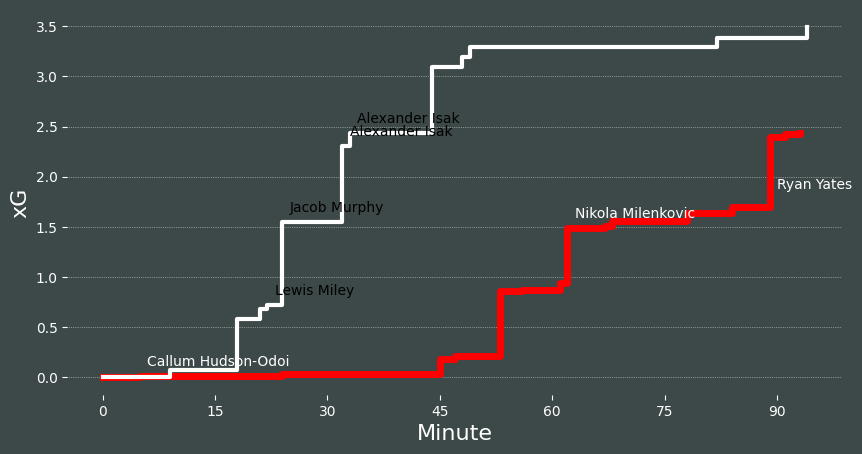

In [26]:
fig, ax=plt.subplots(figsize=(10, 5))
fig.set_facecolor('#3d4848')
ax.set_facecolor('#3d4848')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

ax.step(x=a_min, y=a_cumulative, color='red', label=ateam, linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='white', label=hteam, linewidth=3, where='post')

# Label goals on the graph
for i in range(len(df)):
    if df['result'][i] == 'Goal':
        if df['team'][i] == hteam:
            ax.annotate(df['player'][i], xy=(df['minute'][i], h_cumulative[h_min.index(df['minute'][i])]), xytext=(df['minute'][i] + 1, h_cumulative[h_min.index(df['minute'][i])] + 0.1), color='black', fontsize=10)
        else:
            ax.annotate(df['player'][i], xy=(df['minute'][i], a_cumulative[a_min.index(df['minute'][i])]), xytext=(df['minute'][i] + 1, a_cumulative[a_min.index(df['minute'][i])] + 0.1), color='white', fontsize=10)